In [1]:
# library
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline

from sklearn import preprocessing, utils, tree, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn. metrics import confusion_matrix, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
#    TASK 1    #

In [3]:
file = "diabetes.csv"
dataset = pd.read_csv(file)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(dataset.shape)

(768, 9)


In [5]:
#    TASK 2    #

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#    TASK 3    #

In [8]:
#    3.1 HEATMAP    #

<AxesSubplot: >

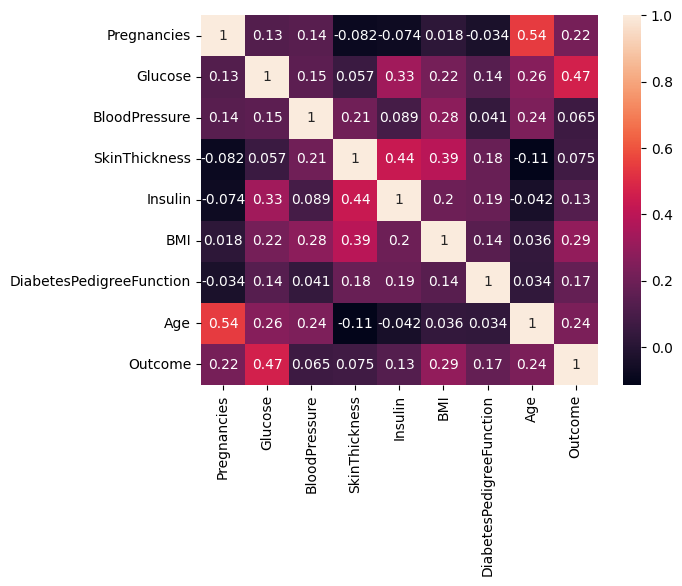

In [9]:
sns.heatmap(dataset.corr(), annot=True)

In [10]:
#    3.2 Hists / boxplots    #

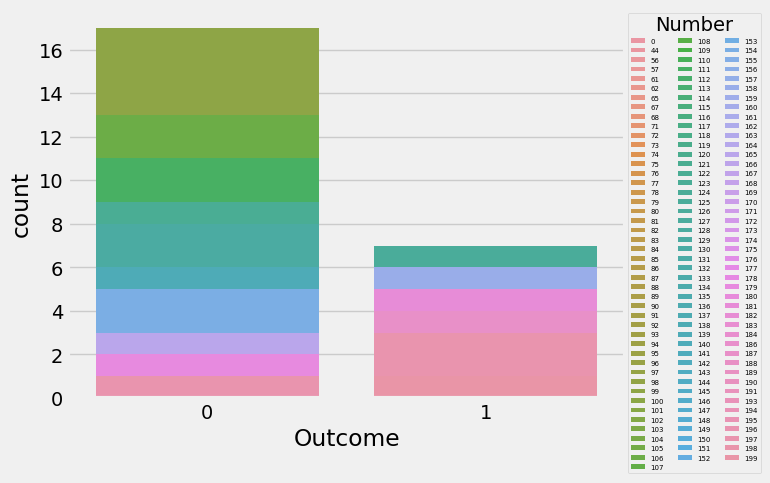

In [11]:
plt.style.use('fivethirtyeight')
sns.countplot(x="Outcome", hue="Glucose", data=dataset, dodge=False)
plt.legend(title = 'Number', bbox_to_anchor = (1, 1), ncols=3, fontsize=5)

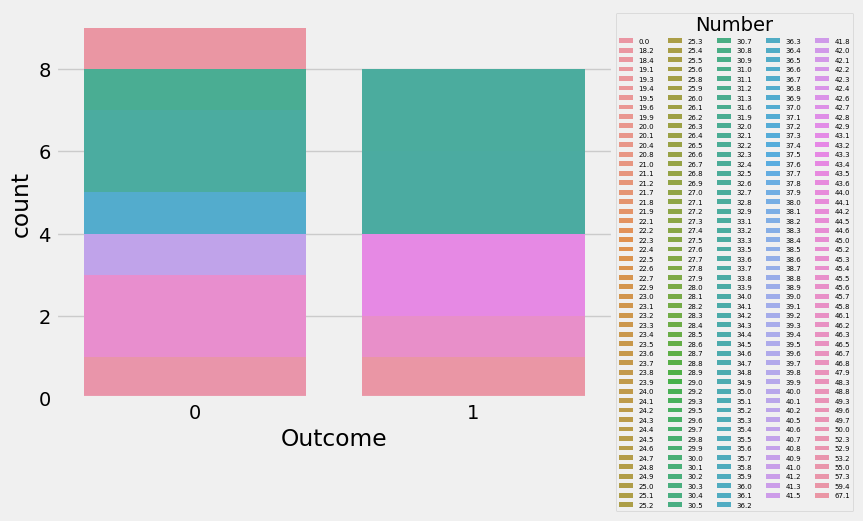

In [12]:
plt.style.use('fivethirtyeight')
sns.countplot(x="Outcome", hue="BMI", data=dataset, dodge=False)
plt.legend(title = 'Number', bbox_to_anchor = (1, 1), ncols=5, fontsize=5)

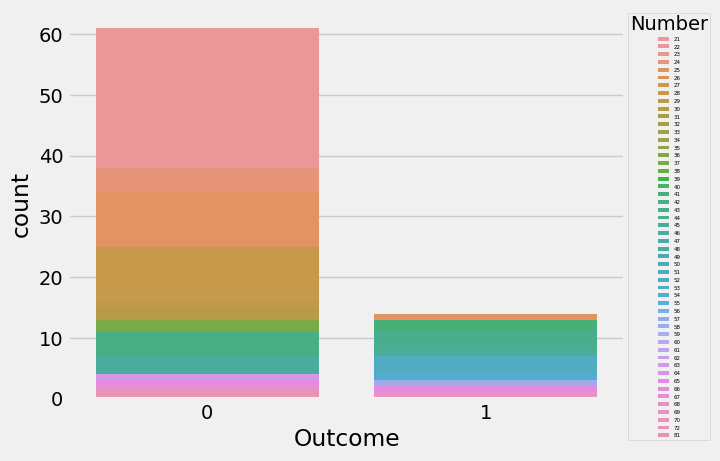

In [13]:
plt.style.use('fivethirtyeight')
sns.countplot(x="Outcome", hue="Age", data=dataset, dodge=False)
plt.legend(title = 'Number', bbox_to_anchor = (1, 1), fontsize=4)

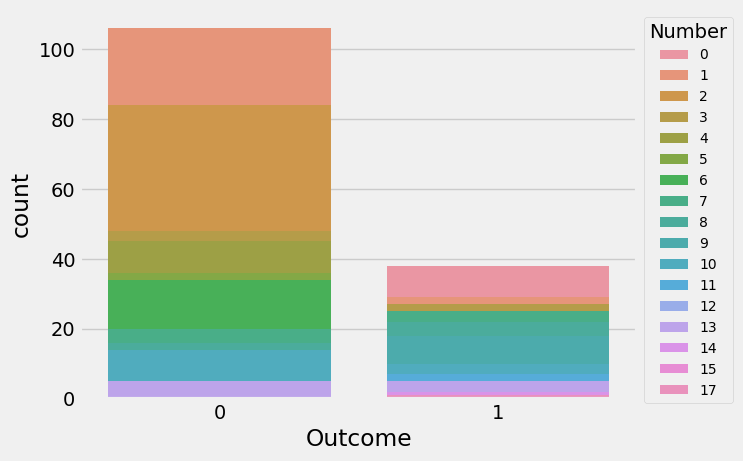

In [14]:
plt.style.use('fivethirtyeight')
sns.countplot(x="Outcome", hue="Pregnancies", data=dataset, dodge=False)
plt.legend(title = 'Number', bbox_to_anchor = (1, 1), fontsize=10)

<AxesSubplot: xlabel='Outcome', ylabel='Glucose'>

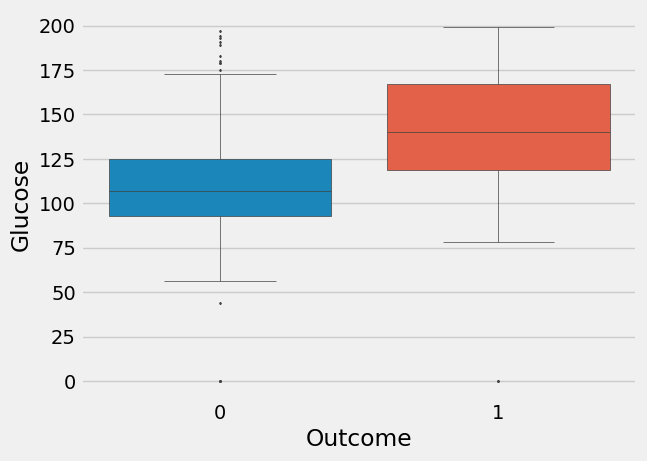

In [15]:
sns.boxplot(x="Outcome", y="Glucose", data=dataset, linewidth = 0.5, fliersize = 1)

<AxesSubplot: xlabel='Outcome', ylabel='BMI'>

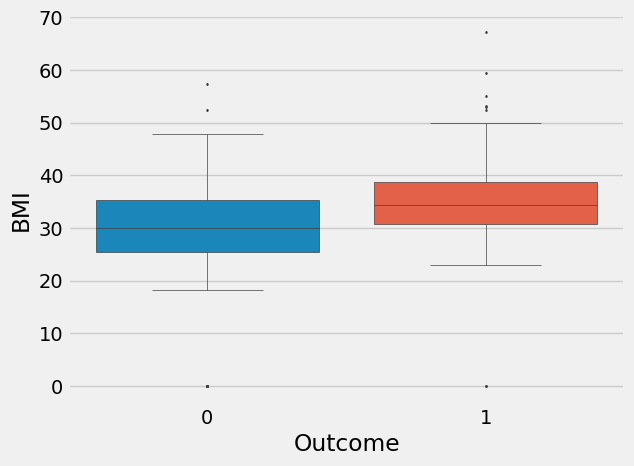

In [16]:
sns.boxplot(x="Outcome", y="BMI", data=dataset, linewidth = 0.5, fliersize = 1)

<AxesSubplot: xlabel='Outcome', ylabel='Age'>

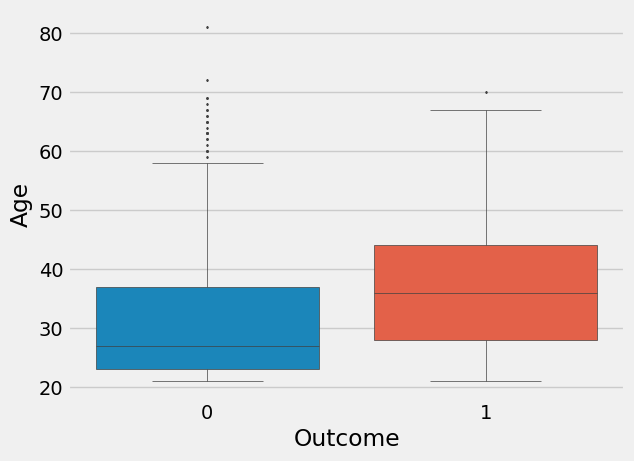

In [17]:
sns.boxplot(x="Outcome", y="Age", data=dataset, linewidth = 0.5, fliersize = 1)

<AxesSubplot: xlabel='Outcome', ylabel='Pregnancies'>

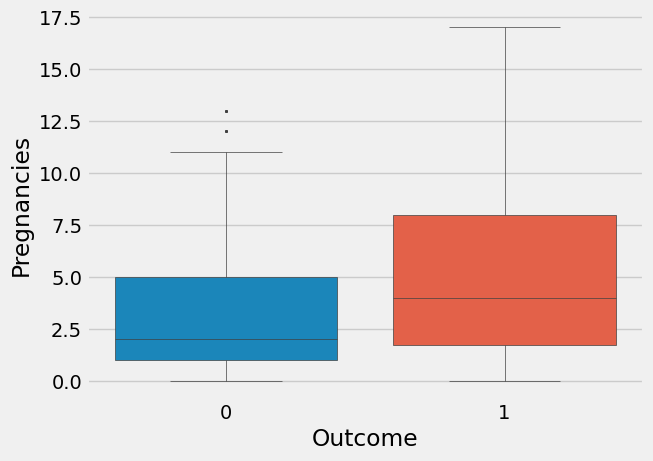

In [18]:
sns.boxplot(x="Outcome", y="Pregnancies", data=dataset, linewidth = 0.5, fliersize = 1)

In [19]:
#    TASK 4 Normalization    #

In [20]:
scaler = preprocessing.MinMaxScaler()
names = dataset.columns
d = scaler.fit_transform(dataset)
scaled_dataset = pd.DataFrame(d, columns=names)
scaled_dataset.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
95,0.352941,0.723618,0.590164,0.272727,0.269504,0.505216,0.075576,0.316667,0.0
96,0.117647,0.462312,0.508197,0.282828,0.000000,0.470939,0.022203,0.050000,0.0
97,0.058824,0.356784,0.393443,0.181818,0.089835,0.304024,0.104611,0.016667,0.0
98,0.352941,0.467337,0.409836,0.303030,0.075650,0.427720,0.118702,0.033333,0.0


In [21]:
#    TASK 5 Learning    #

In [22]:
#splitting the model
X = scaled_dataset.drop('Outcome', axis=1);
y = scaled_dataset['Outcome'];
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [23]:
#    TASK 5.1 kNN    #

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

#predicting test set results
y_pred = knn.predict(X_test)

print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       106
         1.0       0.74      0.52      0.61        48

    accuracy                           0.79       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.79      0.79      0.78       154



[[97  9]
 [23 25]]


In [25]:
#    TASK 5.2 Decision tree    #

In [26]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
#Function to perform training with Entropy
#clf_entropy = DecisionTreeClassifier (criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
#clf_entropy.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

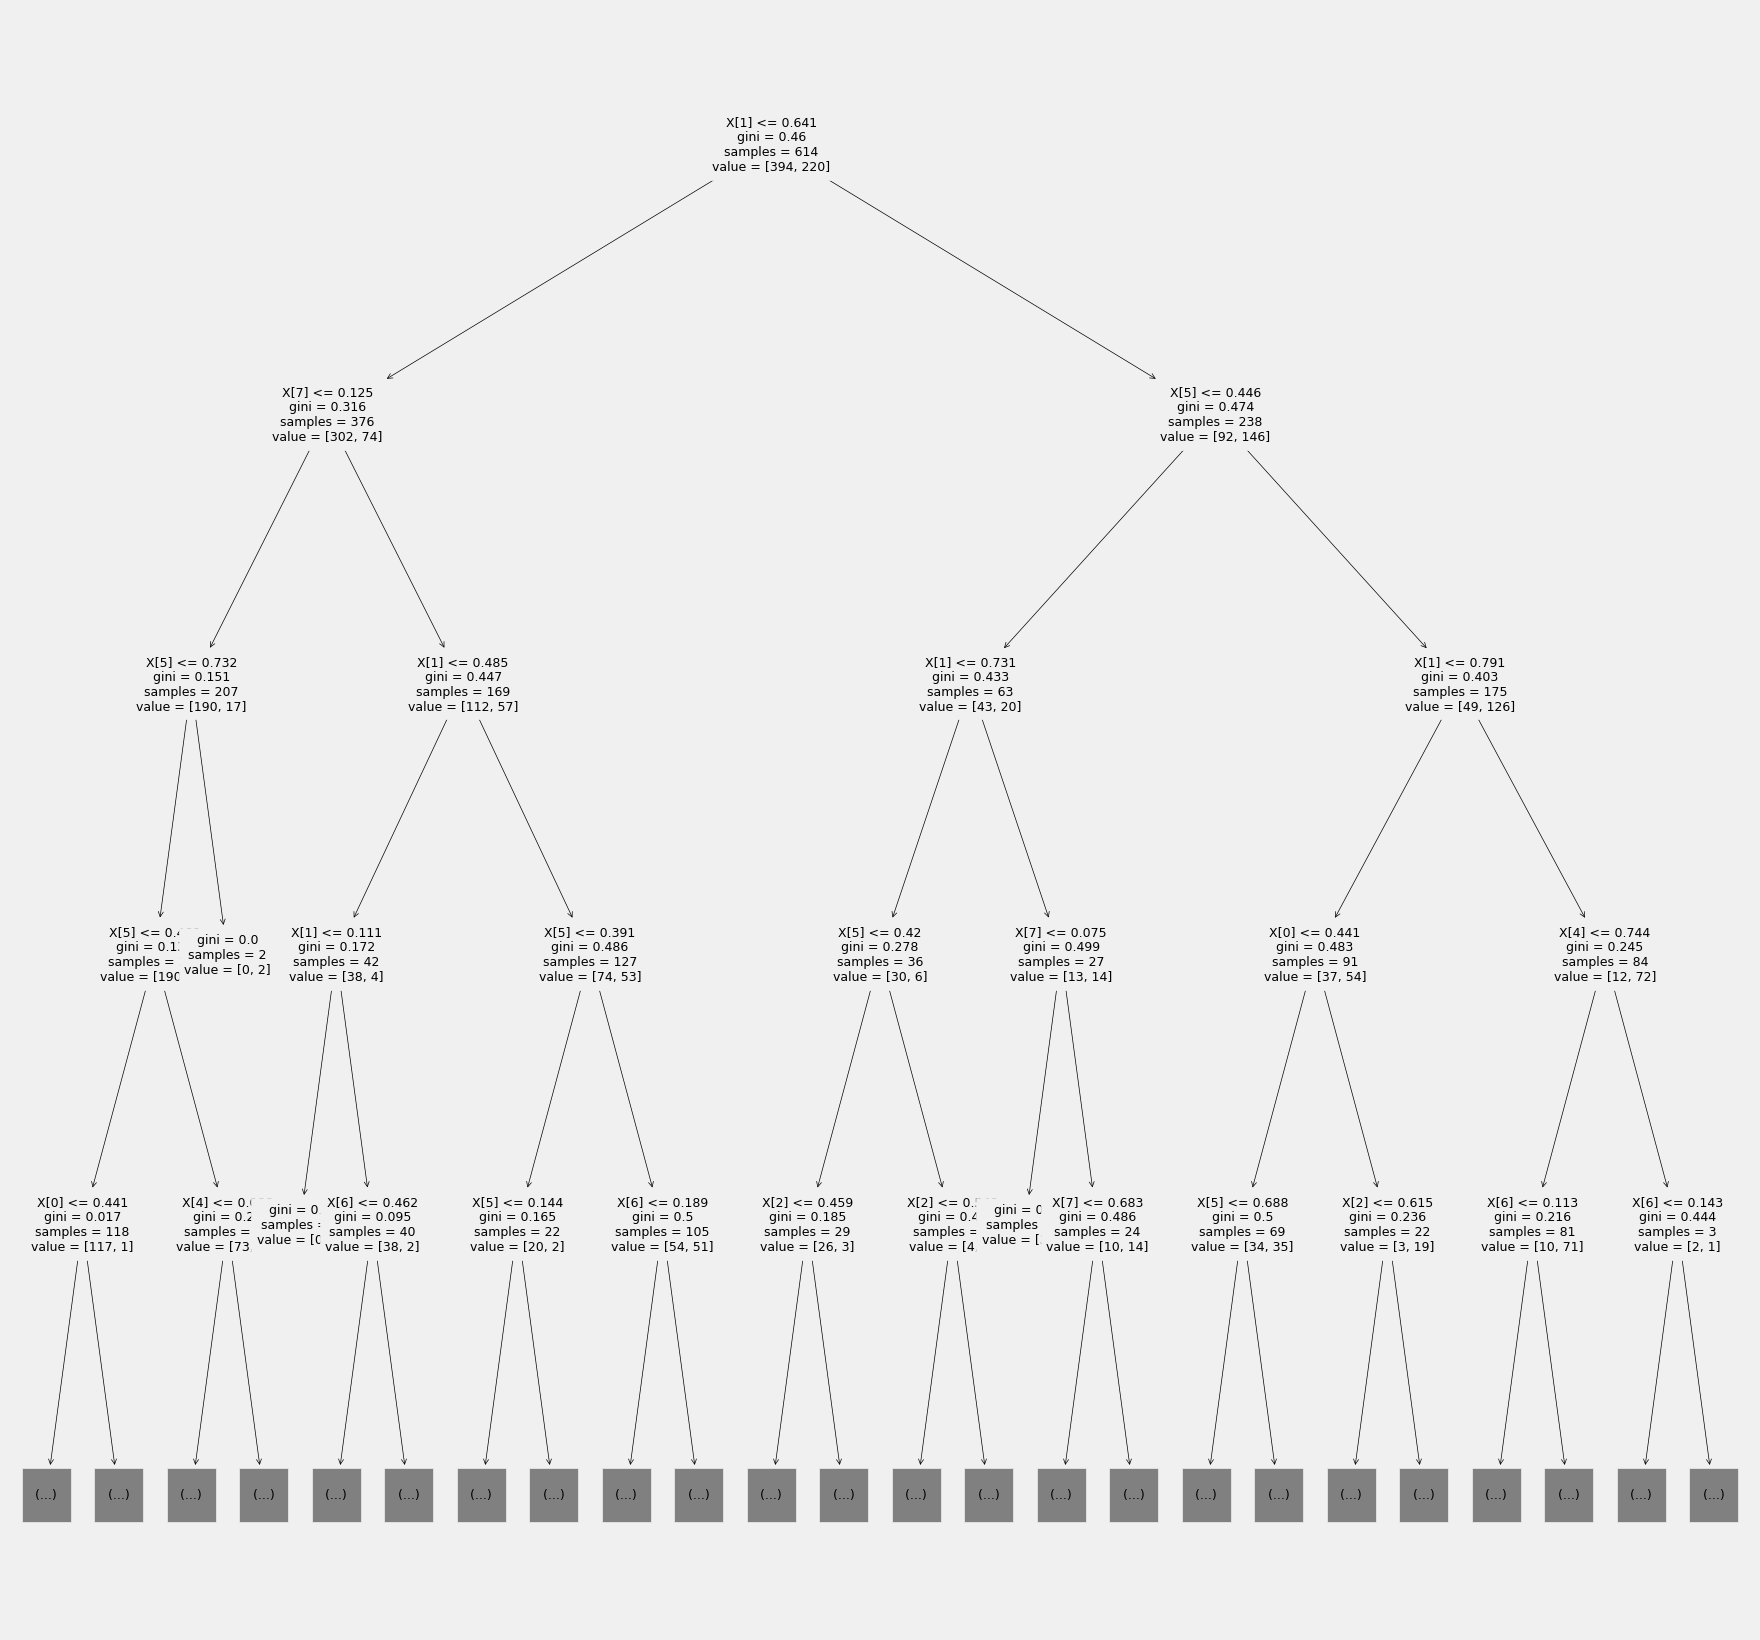

In [27]:
plt.figure(figsize=(20,20))
plot_tree(decision_tree, max_depth=4, fontsize=9)
plt.show()

In [28]:
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       106
         1.0       0.63      0.54      0.58        48

    accuracy                           0.76       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.75      0.76      0.75       154



[[91 15]
 [22 26]]


In [29]:
#    TASK 5.3 SVM    #

In [30]:
svm_alg = svm.SVC()
svm_alg.fit(X_train, y_train)
y_pred = svm_alg.predict(X_test)
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86       106
         1.0       0.77      0.50      0.61        48

    accuracy                           0.80       154
   macro avg       0.79      0.72      0.74       154
weighted avg       0.80      0.80      0.78       154



[[99  7]
 [24 24]]


In [31]:
#    TASK 5.4 Random forest    #

In [32]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87       106
         1.0       0.79      0.54      0.64        48

    accuracy                           0.81       154
   macro avg       0.80      0.74      0.76       154
weighted avg       0.81      0.81      0.80       154



[[99  7]
 [22 26]]


In [33]:
#    TASK 5.5 AdaBoost    #

In [34]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       106
         1.0       0.70      0.54      0.61        48

    accuracy                           0.79       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154



[[95 11]
 [22 26]]


In [35]:
#    TASK 6 Optimal values    #

In [36]:
#    TASK 6.1 Optimal values for kNN    #

In [37]:
accuracy = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    
print("Best accuracy:",max(accuracy),"when K =",accuracy.index(max(accuracy))+1)

Best accuracy: 0.7987012987012987 when K = 25


In [38]:
knn = KNeighborsClassifier(n_neighbors = accuracy.index(max(accuracy))+1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87       106
         1.0       0.81      0.46      0.59        48

    accuracy                           0.80       154
   macro avg       0.81      0.71      0.73       154
weighted avg       0.80      0.80      0.78       154



[[101   5]
 [ 26  22]]


In [39]:
#    TASK 6.1 Optimal values for SVM    #

In [40]:
k = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
svm_alg = GridSearchCV((svm.SVC()), k)
svm_alg.fit(X_train, y_train)
print(svm_alg.best_params_)

{'C': 10, 'gamma': 0.1}


In [42]:
svm_alg = svm.SVC(C=10, gamma=0.1)
svm_alg.fit(X_train, y_train)
y_pred = svm_alg.predict(X_test)
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85       106
         1.0       0.75      0.44      0.55        48

    accuracy                           0.78       154
   macro avg       0.77      0.69      0.70       154
weighted avg       0.77      0.78      0.76       154



[[99  7]
 [27 21]]


In [48]:
dataset['Outcome'].value_counts()[0]

500

In [49]:

dataset['Outcome'].value_counts()[1]

268